# Capstone - Intraday - Multiday Trading Model for Crypto currencies


## Problem Statement
Algorithmic intraday trading is impacting the cryptocurrency market significantly. People have
limitations when trading the highly volatile cryptocurrencies compared to automated trading
algorithms which have the benefits of near-instantaneous calculations, efficient execution, and
absence of emotional influence on trading decisions.
This project aims to create and optimize a model for profitable automated intraday trading based on
breakout strategies, utilising intraday price data for cryptocurrencies. This will require the
identification of current price trends along with support and resistance levels in order to plan possible
entry and exit points.
The research will aim to optimize price prediction accuracy and trade execution timing through the
integration of machine learning algorithms and technical analysis indicators, in order to improve
profitability. The study will also examine the role of liquidity, order flow, and risk management
techniques, ensuring the models are adaptable to rapidly changing market dynamics while minimizing
exposure to adverse price movements.

## Literature Review

#### _Who are the key people in the field_?

A key researcher in the field is Professor Gil Cohen, head of the management department at
Western Galilee Academic College, Israel. He has published much literature in financial and
mathematical journals with a focus on algorithmic trading, and more recently specifically on intraday
trading strategies for cryptocurrencies. In a highly relevant 2023 publication entitled “Intraday
algorithmic trading strategies for cryptocurrencies”, he utilises 4 variants of LSTM algorithmic
trading systems on five cryptocurrencies to identify the set-up. Cohen’s findings demonstrate that
the model based on the relative strength index (RSI) outperforms those based on buy & hold (B&H)
strategy, moving average convergence/divergence (MACD), and Keltner Channels [1]. We discuss his
work further in the context of the ‘Competitor Analysis’.

#### _What has the research to date shown_?

The research on intraday trading strategies for cryptocurrencies spans multiple disciplines, including finance, economics, computer science, and artificial intelligence, with Bitcoin being the most commonly studied currency.

Key findings include:

- Technical indicators: Balcilar (2017) found trading volume to be a strong predictor of Bitcoin price, while Liu and Tsyvinski (2021) identified momentum effects linked to investor attention.

- Market anomalies: Caporale and Plastun (2019) identified a "day-of-the-week" effect for Bitcoin, showing higher returns on Mondays.

- Sentiment analysis: Studies like Jeleskovic and Mackay (2023) and Sohangir (2018) explored the impact of social media sentiment (e.g., Twitter, StockTwits) on price volatility, with varying effects depending on the currency.

- Machine learning: Researchers have applied both supervised and unsupervised learning models for cryptocurrency price prediction, with popular methods including decision trees, support vector machines (SVM), and neural networks (especially LSTM). Model accuracy depends on factors like data attributes, model architecture, and hyperparameter tuning, with no single methodology consistently outperforming others.

## Proposal

Our proposed intervention addresses gaps in the current literature by improving upon existing methodologies in cryptocurrency price prediction.

Key improvements include:

- Model architecture optimization: The research will extend existing work by comparing CNN-LSTM, bidirectional LSTM, and encoder-decoder LSTM models, which are effective for time-series prediction and long-term pattern recognition.

- Hybrid approach: The model will integrate both technical indicators (RSI, MACD, and MFI) and sentiment analysis, broadening data sources to enhance prediction accuracy.

- High-frequency data: The study will leverage the abundant data available in cryptocurrency markets, using high-frequency and long-term data to capture market fluctuations.

- Focus on volatility and liquidity: By focusing on highly traded cryptocurrencies like Bitcoin and Ethereum, the research aims to address challenges of data volatility and liquidity, common issues in smaller cryptocurrencies.

# Design

## Imports

In [1]:
# imports
!pip install pandas_ta
!pip install requests

url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py310hde88566_4.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.10/dist-packages/ lib/python3.10/site-packages/talib --strip-components=3
import talib as ta

!pip install yfinance


import pandas as pd
import datetime
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import pandas as pd
import requests
import yfinance as yf
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import RepeatVector, TimeDistributed

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218909 sha256=8ebe06ee6e417ed9ec52ae04b4daba3846871e24860f9335a2f5e67e6221976b
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4039    0  4039    0     0  11032      0 --:--:-- --:--:-- --:--:-- 11065
100  517k  100  517k    0     0   680k      0 --:--:-- --:--:-- --:--:--  680k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4115    0  4115    0     0  17698      0 --:--:-- --:--:-- --:--:-- 17660
100  392k  100  392k    0   

## Data Collection

In [2]:
# Download BTC data for the past 5 years
btc_data = yf.download("BTC-USD", start="2023-10-20", end="2024-10-20", interval="1h")

# Download ETH data for the past 5 years
eth_data = yf.download("ETH-USD", start="2023-10-20", end="2024-10-20", interval="1h")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## Exploratory Data Analysis



BTC 1-Hour Data:
Price                         Adj Close         Close          High  \
Ticker                          BTC-USD       BTC-USD       BTC-USD   
Datetime                                                              
2024-10-19 19:00:00+00:00  68169.734375  68169.734375  68235.781250   
2024-10-19 20:00:00+00:00  68235.125000  68235.125000  68249.625000   
2024-10-19 21:00:00+00:00  68231.617188  68231.617188  68328.023438   
2024-10-19 22:00:00+00:00  68332.828125  68332.828125  68384.664062   
2024-10-19 23:00:00+00:00  68369.390625  68369.390625  68389.742188   

Price                               Low          Open   Volume  
Ticker                          BTC-USD       BTC-USD  BTC-USD  
Datetime                                                        
2024-10-19 19:00:00+00:00  68155.937500  68176.851562        0  
2024-10-19 20:00:00+00:00  68167.031250  68170.945312        0  
2024-10-19 21:00:00+00:00  68227.929688  68234.859375        0  
2024-10-19 22:00:00+00:0

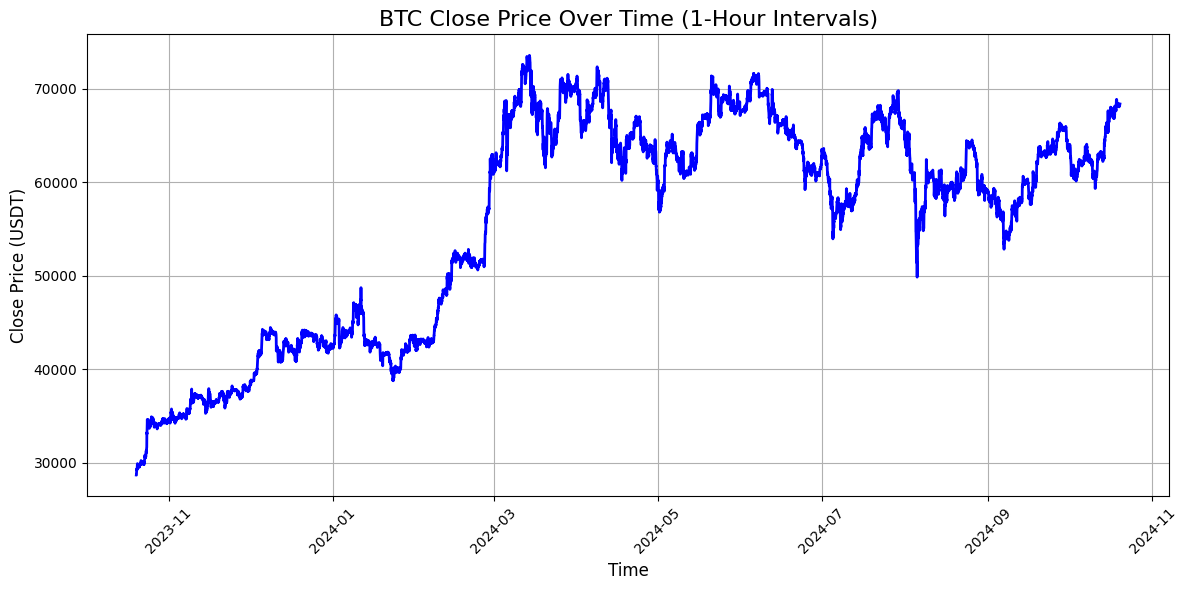

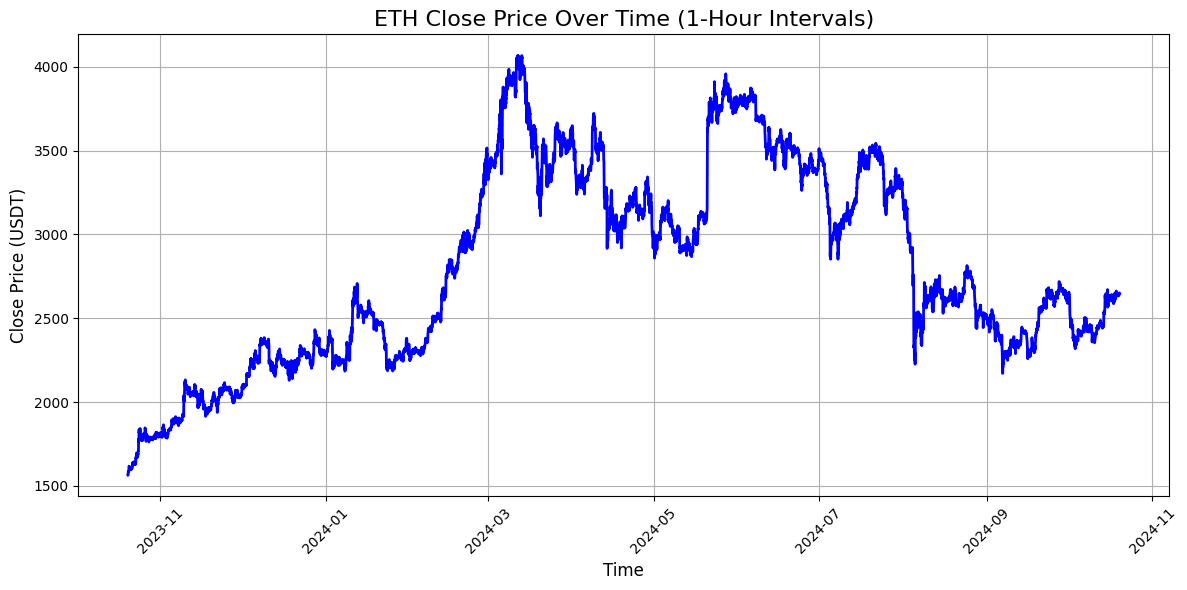

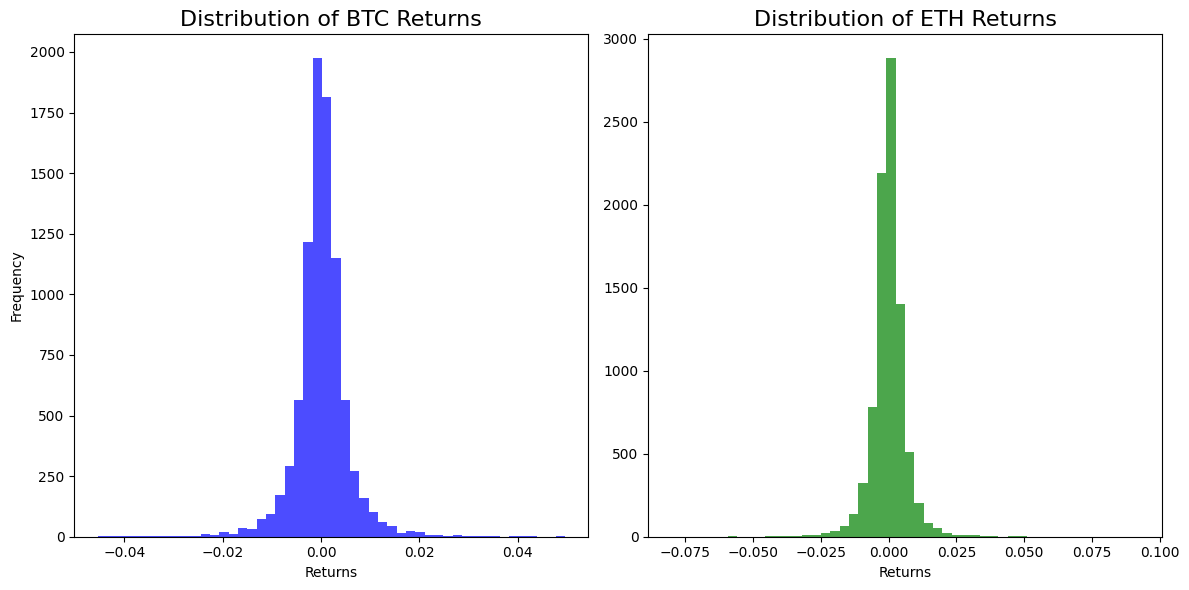

<ipython-input-3-8beef1359259>:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


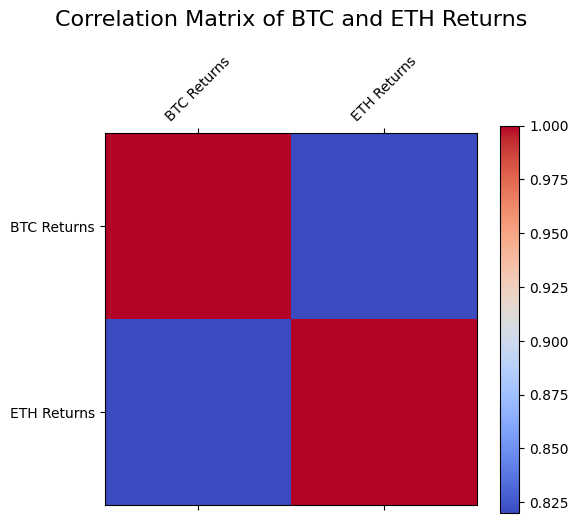

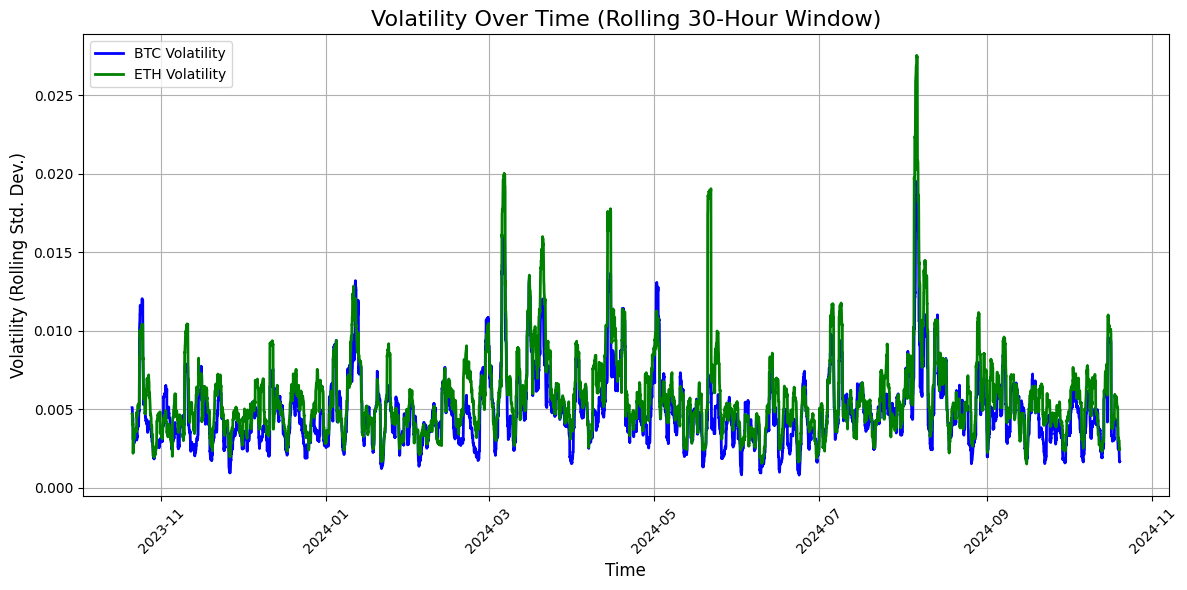

In [3]:
# Display the data
print("BTC 1-Hour Data:")
print(btc_data.tail())

print("\nETH 1-Hour Data:")
print(eth_data.tail())

 # Plot for BTC
plt.figure(figsize=(12, 6))
plt.plot(btc_data.index, btc_data['Close'], color='blue', linewidth=2)
plt.title('BTC Close Price Over Time (1-Hour Intervals)', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Close Price (USDT)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot for ETH
plt.figure(figsize=(12, 6))
plt.plot(eth_data.index, eth_data['Close'], color='blue', linewidth=2)
plt.title('ETH Close Price Over Time (1-Hour Intervals)', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Close Price (USDT)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate returns from price data
def calculate_returns(price_data):
    price_data['returns'] = price_data['Close'].pct_change()
    return price_data

# Function to plot the distribution of returns
def plot_return_distribution(btc_data, eth_data):
    plt.figure(figsize=(12, 6))

    # Plot BTC returns
    plt.subplot(1, 2, 1)
    plt.hist(btc_data['returns'].dropna(), bins=50, color='blue', alpha=0.7)
    plt.title('Distribution of BTC Returns', fontsize=16)
    plt.xlabel('Returns')
    plt.ylabel('Frequency')

    # Plot ETH returns
    plt.subplot(1, 2, 2)
    plt.hist(eth_data['returns'].dropna(), bins=50, color='green', alpha=0.7)
    plt.title('Distribution of ETH Returns', fontsize=16)
    plt.xlabel('Returns')

    plt.tight_layout()
    plt.show()

# Function to compute and display the correlation matrix
def plot_correlation_matrix(btc_data, eth_data):
    returns_df = pd.DataFrame({
        'BTC Returns': btc_data['returns'],
        'ETH Returns': eth_data['returns']
    })

    # Calculate the correlation matrix
    corr_matrix = returns_df.corr()

    # Plot the correlation matrix
    plt.figure(figsize=(6, 5))
    plt.matshow(corr_matrix, cmap='coolwarm', fignum=1)
    plt.title('Correlation Matrix of BTC and ETH Returns', pad=20, fontsize=16)
    plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
    plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
    plt.colorbar()
    plt.tight_layout()
    plt.show()

    return corr_matrix

# Calculate returns for BTC and ETH
btc_data = calculate_returns(btc_data)
eth_data = calculate_returns(eth_data)

# Plot return distributions and correlation matrix
plot_return_distribution(btc_data, eth_data)
correlation_matrix = plot_correlation_matrix(btc_data, eth_data)

# Function to calculate rolling volatility (standard deviation of returns)
def calculate_volatility(price_data, window=30):
    price_data['volatility'] = price_data['returns'].rolling(window=window).std()
    return price_data

# Function to plot the volatility for both BTC and ETH
def plot_volatility(btc_data, eth_data):
    plt.figure(figsize=(12, 6))

    # Plot BTC volatility
    plt.plot(btc_data.index, btc_data['volatility'], label='BTC Volatility', color='blue', linewidth=2)

    # Plot ETH volatility
    plt.plot(eth_data.index, eth_data['volatility'], label='ETH Volatility', color='green', linewidth=2)

    # Add titles and labels
    plt.title('Volatility Over Time (Rolling 30-Hour Window)', fontsize=16)
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('Volatility (Rolling Std. Dev.)', fontsize=12)

    # Formatting the date labels
    plt.xticks(rotation=45)

    # Add grid and legend
    plt.grid(True)
    plt.legend(loc='upper left')

    # Show plot
    plt.tight_layout()
    plt.show()

# Calculate volatility for both BTC and ETH using a rolling window of 30 periods
btc_data = calculate_volatility(btc_data, window=30)
eth_data = calculate_volatility(eth_data, window=30)

# Plot the volatility for both BTC and ETH
plot_volatility(btc_data, eth_data)




## Technical Indicators


In [4]:
def compute_technical_indicators(price_data, ticker):
    # Flatten the MultiIndex to access the columns correctly
    if isinstance(price_data.columns, pd.MultiIndex):
        price_data.columns = ['_'.join(col).strip() for col in price_data.columns.values]

    # Access the required columns based on the ticker
    close_col = f"Close_{ticker}"
    high_col = f"High_{ticker}"
    low_col = f"Low_{ticker}"
    volume_col = f"Volume_{ticker}"

    # Ensure these columns exist
    necessary_columns = [close_col, high_col, low_col, volume_col]
    for col in necessary_columns:
        if col not in price_data.columns:
            print(f"Column '{col}' is missing. Adjusting processing.")

    # # Clean the data by dropping missing values
    # subset = [col for col in necessary_columns if col in price_data.columns]
    # price_data = price_data.dropna(subset=subset)

    # Convert to numpy arrays
    close_prices = price_data[close_col].to_numpy().astype(float) if close_col in price_data else None
    high_prices = price_data[high_col].to_numpy().astype(float) if high_col in price_data else None
    low_prices = price_data[low_col].to_numpy().astype(float) if low_col in price_data else None
    volume = price_data[volume_col].to_numpy().astype(float) if volume_col in price_data else None

    # Calculate RSI (if Close is available)
    if close_prices is not None:
        price_data['RSI'] = ta.RSI(close_prices, timeperiod=14)

    # Calculate MACD (if Close is available)
    if close_prices is not None:
        macd, macd_signal, macd_hist = ta.MACD(
            close_prices, fastperiod=12, slowperiod=26, signalperiod=9
        )
        price_data['MACD'] = macd
        price_data['MACD_signal'] = macd_signal
        price_data['MACD_hist'] = macd_hist

    # Calculate MFI (if High, Low, Close, and Volume are available)
    if all(x is not None for x in [high_prices, low_prices, close_prices, volume]):
        price_data['MFI'] = ta.MFI(
            high_prices, low_prices, close_prices, volume, timeperiod=14
        )

    # Calculate EMA (if Close is available)
    if close_prices is not None:
        price_data['EMA_12'] = ta.EMA(close_prices, timeperiod=12)
        price_data['EMA_26'] = ta.EMA(close_prices, timeperiod=26)

    # Calculate SMA (if Close is available)
    if close_prices is not None:
        price_data['SMA_50'] = ta.SMA(close_prices, timeperiod=50)
        price_data['SMA_200'] = ta.SMA(close_prices, timeperiod=200)

    return price_data


In [5]:
# Compute technical indicators for BTC and ETH
btc_data = compute_technical_indicators(btc_data, ticker="BTC-USD")
eth_data = compute_technical_indicators(eth_data, ticker="ETH-USD")

# Display the first few rows of the DataFrame with indicators
print("BTC Data with Indicators:")
print(btc_data[['Close_BTC-USD', 'RSI', 'MACD', 'MACD_signal', 'MFI', 'EMA_12', 'SMA_50']].tail())

print("\nETH Data with Indicators:")
print(eth_data[['Close_ETH-USD', 'RSI', 'MACD', 'MACD_signal', 'MFI', 'EMA_12', 'SMA_50']].tail())


BTC Data with Indicators:
                           Close_BTC-USD        RSI       MACD  MACD_signal  \
Datetime                                                                      
2024-10-19 19:00:00+00:00   68169.734375  48.871193  -4.034395    31.778368   
2024-10-19 20:00:00+00:00   68235.125000  51.171352  -1.016382    25.219418   
2024-10-19 21:00:00+00:00   68231.617188  51.038705   1.079916    20.391517   
2024-10-19 22:00:00+00:00   68332.828125  54.688393  10.783814    18.469977   
2024-10-19 23:00:00+00:00   68369.390625  55.965390  21.180358    19.012053   

                             MFI        EMA_12        SMA_50  
Datetime                                                      
2024-10-19 19:00:00+00:00    0.0  68201.038273  68061.199063  
2024-10-19 20:00:00+00:00    0.0  68206.282385  68087.627969  
2024-10-19 21:00:00+00:00    0.0  68210.180047  68116.243281  
2024-10-19 22:00:00+00:00    0.0  68229.048982  68143.980000  
2024-10-19 23:00:00+00:00  100.0  68250.64

## Sentiment Analysis

We will use the _Crypto Fear and Greed Index_ for sentiment Analysis.

The Crypto Fear and Greed Index measures the overall sentiment in the cryptocurrency market, ranging from 0 (Extreme Fear) to 100 (Extreme Greed). It is derived from several data points:

- Volatility (25%): Sudden price drops reflect fear.
Market Momentum/Volume (25%): High volume in a rising market indicates greed.

- Social Media (15%): Analyzes social media activity for sentiment.

- Surveys (15%): User sentiment surveys (currently paused).

- Bitcoin Dominance (10%): Increased Bitcoin dominance signals fear as investors move to the safer asset.

- Google Trends (10%): Tracks search terms related to cryptocurrencies to gauge sentiment.

_Why Fear and Greed Index is Better than Tweet Sentiment Analysis_

- Multi-Factor Approach: Combines market data (volatility, volume) with sentiment, unlike tweet analysis, which relies solely on social media posts.

- Broader Sentiment: Captures a wider range of investors, including institutional players, via Google Trends and market dominance, whereas tweet sentiment is limited to vocal retail traders.

- More Accurate: Less prone to noise from bots, fake news, or emotional tweets, making it more reliable for understanding market sentiment.

- Historical Context: Shows patterns over time, helping investors see if sentiment is at extreme levels compared to previous market conditions.

<ipython-input-6-cadaa4d5ca3e>:11: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')


   value value_classification  timestamp time_until_update
0     83        Extreme Greed 2024-11-18             14243
1     90        Extreme Greed 2024-11-17               NaN
2     86        Extreme Greed 2024-11-16               NaN
3     80        Extreme Greed 2024-11-15               NaN
4     88        Extreme Greed 2024-11-14               NaN


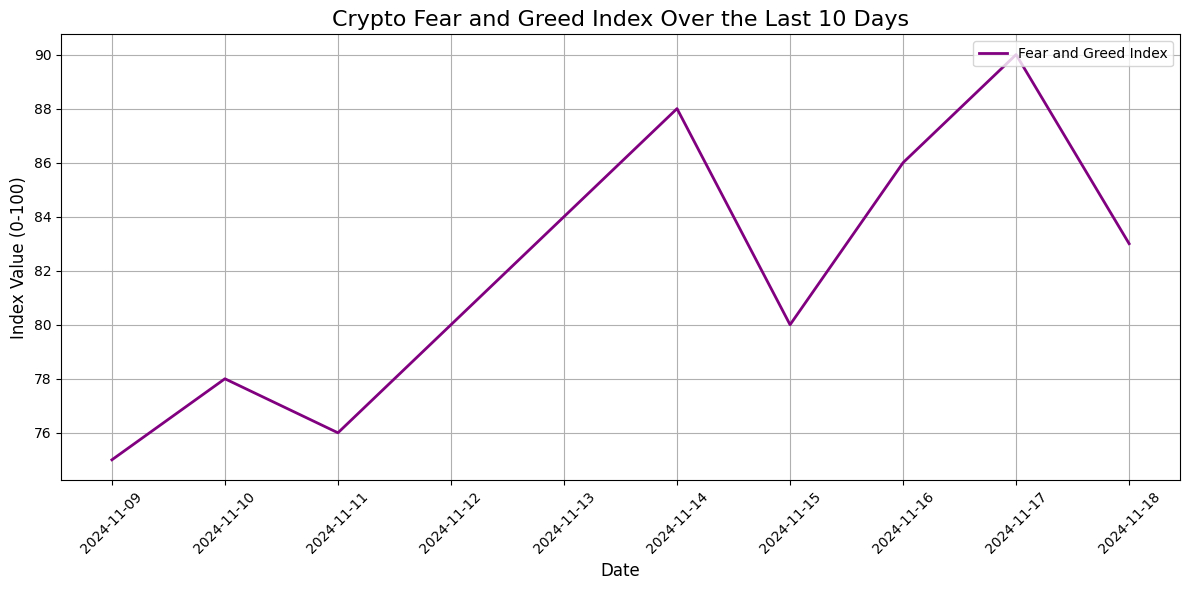

Correlation between BTC price and Fear & Greed Index: nan


In [6]:
# Function to fetch fear and greed index data
def fetch_fear_greed_index():
    url = "https://api.alternative.me/fng/?limit=10"
    response = requests.get(url)
    data = response.json()

    # Parse the data into a DataFrame
    df = pd.DataFrame(data['data'])

    # Convert timestamps and values to the appropriate formats
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
    df['value'] = pd.to_numeric(df['value'])

    return df

# Fetch Fear and Greed Index data
fng_data = fetch_fear_greed_index()

# average value over duration to be used in confluence for trading signal
avg_fng_value = fng_data['value'].mean()

# Display the first few rows of the data
print(fng_data.head())

# Plot Fear and Greed Index over time
plt.figure(figsize=(12, 6))
plt.plot(fng_data['timestamp'], fng_data['value'], label='Fear and Greed Index', color='purple', linewidth=2)
plt.title('Crypto Fear and Greed Index Over the Last 10 Days', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Index Value (0-100)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

btc_data['time'] = btc_data.index

# Create 'time' column in fng_data by converting 'timestamp' to date
fng_data['time'] = pd.to_datetime(fng_data['timestamp']).dt.date

# Convert the 'time' column in btc_data to date (if needed, to ensure format consistency)
btc_data['time'] = pd.to_datetime(btc_data['time']).dt.date

# Now merge on the new 'time' column
merged_data = pd.merge(btc_data, fng_data[['time', 'value']], how='inner', on='time')


# Calculate correlation between Bitcoin close price and the Fear and Greed Index
correlation = merged_data['Close_BTC-USD'].corr(merged_data['value'])

print(f'Correlation between BTC price and Fear & Greed Index: {correlation:.2f}')



## Algorithm Selection

We will split the data into training and testing for different LSTM methods to derive best way to predict prices

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


# Function to preprocess data for LSTM
def preprocess_data(price_data, ticker, time_steps=60):
    """
    Prepares the data for LSTM. Converts it into sequences of `time_steps`.
    """
    close_col = f"Close_{ticker}"
    scaler = MinMaxScaler(feature_range=(0, 1))
    price_data_scaled = scaler.fit_transform(price_data[[close_col]])

    X, y = [], []
    for i in range(time_steps, len(price_data_scaled)):
        X.append(price_data_scaled[i-time_steps:i, 0])
        y.append(price_data_scaled[i, 0])

    X, y = np.array(X), np.array(y)

    # Reshape X to be 3D (samples, time steps, features) for LSTM models
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))

    return X, y, scaler

# Prepare data for both BTC and ETH (60 time steps)
btc_data_clean, btc_target, btc_scaler = preprocess_data(btc_data, 'BTC-USD')
eth_data_clean, eth_target, eth_scaler = preprocess_data(eth_data, 'ETH-USD')

# Split into training and testing (80% training, 20% testing)
X_train_btc, X_test_btc, y_train_btc, y_test_btc = train_test_split(btc_data_clean, btc_target, test_size=0.2, shuffle=False)
X_train_eth, X_test_eth, y_train_eth, y_test_eth = train_test_split(eth_data_clean, eth_target, test_size=0.2, shuffle=False)


In [8]:
# CNN-LSTM Model
def build_cnn_lstm(input_shape):
    model = Sequential()

    # CNN layers
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))

    # LSTM layers
    model.add(LSTM(units=50, return_sequences=False))

    # Dense layer
    model.add(Dense(units=1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Build and train the CNN-LSTM model for BTC
cnn_lstm_model_btc = build_cnn_lstm((X_train_btc.shape[1], 1))
cnn_lstm_model_btc.fit(X_train_btc, y_train_btc, epochs=10, batch_size=32)

# Build and train the CNN-LSTM model for ETH
cnn_lstm_model_eth = build_cnn_lstm((X_train_eth.shape[1], 1))
cnn_lstm_model_eth.fit(X_train_eth, y_train_eth, epochs=10, batch_size=32)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step - loss: 0.0406
Epoch 2/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 3.7620e-04
Epoch 3/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 3.7355e-04
Epoch 4/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 3.2617e-04
Epoch 5/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 3.3511e-04
Epoch 6/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 3.0248e-04
Epoch 7/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 2.5674e-04
Epoch 8/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 2.3756e-04
Epoch 9/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 2.4697e-04
Epoch 10/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 1.9907e-04
Epoch 1/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0442
Epoch 2/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 4.2486e-04
Epoch 3/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 4.0934e-04
Epoch 4/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 3.6244e-0

In [9]:
# Bidirectional LSTM Model
def build_bidirectional_lstm(input_shape):
    model = Sequential()

    model.add(Bidirectional(LSTM(units=50, return_sequences=False), input_shape=input_shape))

    # Dense layer
    model.add(Dense(units=1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Build and train the Bidirectional LSTM model for BTC
bi_lstm_model_btc = build_bidirectional_lstm((X_train_btc.shape[1], 1))
bi_lstm_model_btc.fit(X_train_btc, y_train_btc, epochs=10, batch_size=32)

# Build and train the Bidirectional LSTM model for ETH
bi_lstm_model_eth = build_bidirectional_lstm((X_train_eth.shape[1], 1))
bi_lstm_model_eth.fit(X_train_eth, y_train_eth, epochs=10, batch_size=32)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 14s 41ms/step - loss: 0.0345
Epoch 2/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 4.2277e-04
Epoch 3/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - loss: 3.1029e-04
Epoch 4/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 2.8178e-04
Epoch 5/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - loss: 2.3956e-04
Epoch 6/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 2.0425e-04
Epoch 7/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 1.7490e-04
Epoch 8/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 1.7009e-04
Epoch 9/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 1.6653e-04
Epoch 10/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - loss: 1.4631e-04
Epoch 1/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - loss: 0.0344
Epoch 2/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - loss: 5.9125e-04
Epoch 3/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - loss: 4.6547e-04
Epoch 4/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 3.1559e-04
Epo

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


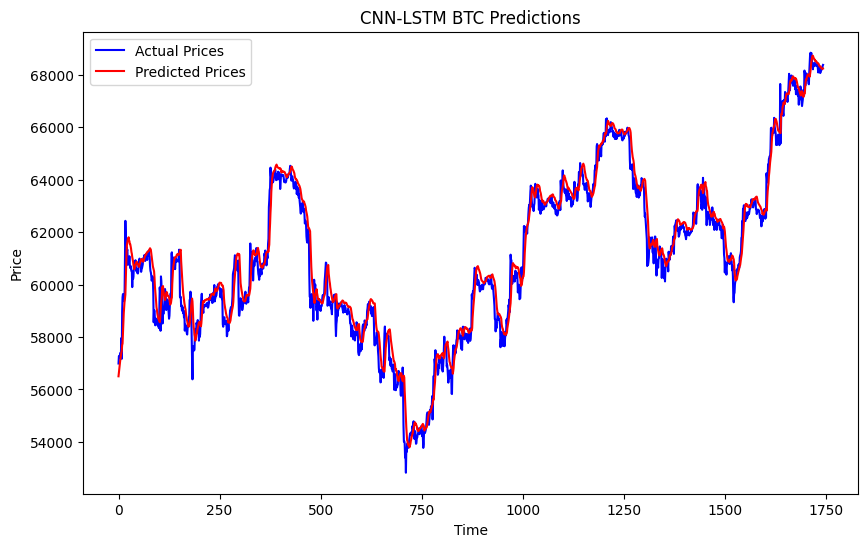

55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step


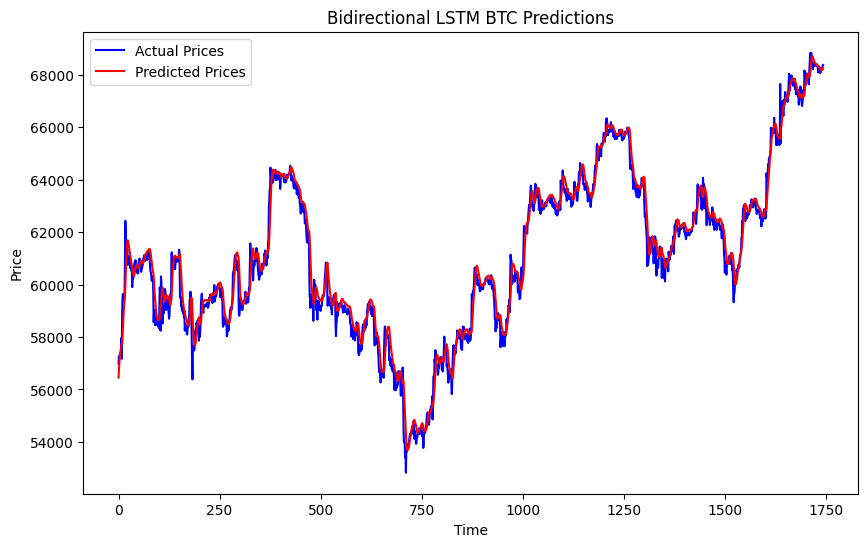

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


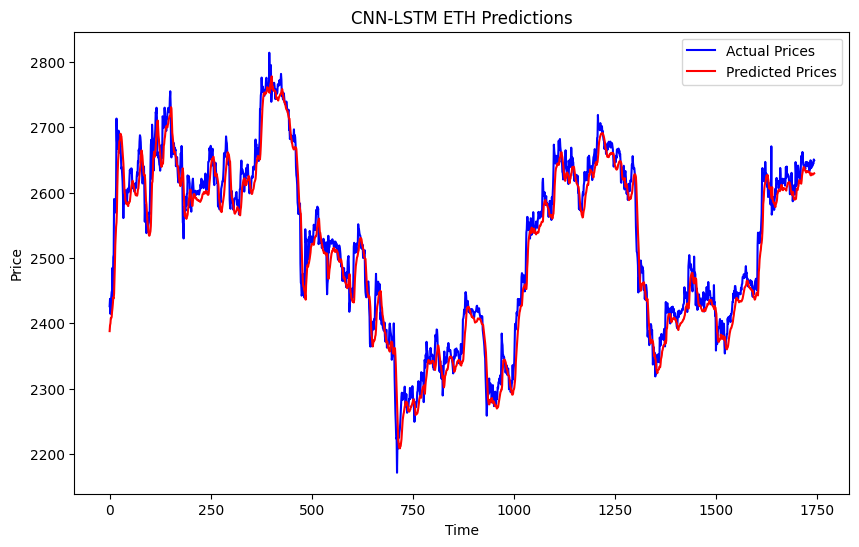

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


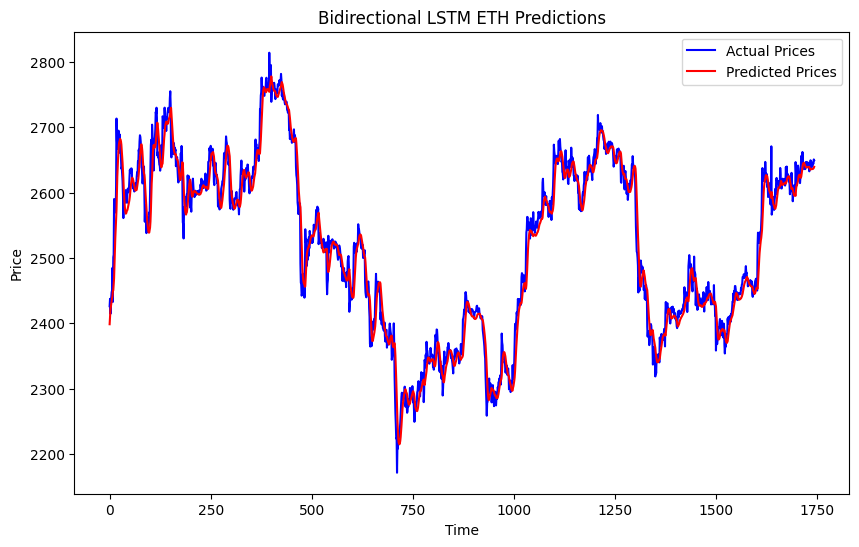

BTC CNN-LSTM RMSE: 577.5640827401234
BTC Bidirectional LSTM RMSE: 474.1074213976433
ETH CNN-LSTM RMSE: 28.7985169436204
ETH Bidirectional LSTM RMSE: 24.23122860451058


In [10]:
# Function to evaluate the model and plot predictions
import matplotlib.pyplot as plt

def evaluate_model(model, X_test, y_test, scaler, title):
    # Make predictions
    predictions = model.predict(X_test)

    # Inverse scaling to get actual price values
    predictions = scaler.inverse_transform(predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Plot the predictions
    plt.figure(figsize=(10, 6))
    plt.plot(y_test, color='blue', label='Actual Prices')
    plt.plot(predictions, color='red', label='Predicted Prices')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    # Return RMSE
    from sklearn.metrics import mean_squared_error
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    return rmse

# Evaluate CNN-LSTM, Bidirectional LSTM LSTM for BTC
rmse_cnn_lstm_btc = evaluate_model(cnn_lstm_model_btc, X_test_btc, y_test_btc, btc_scaler, 'CNN-LSTM BTC Predictions')
rmse_bi_lstm_btc = evaluate_model(bi_lstm_model_btc, X_test_btc, y_test_btc, btc_scaler, 'Bidirectional LSTM BTC Predictions')

# Evaluate CNN-LSTM, Bidirectional LSTM, and Encoder-Decoder LSTM for ETH
rmse_cnn_lstm_eth = evaluate_model(cnn_lstm_model_eth, X_test_eth, y_test_eth, eth_scaler, 'CNN-LSTM ETH Predictions')
rmse_bi_lstm_eth = evaluate_model(bi_lstm_model_eth, X_test_eth, y_test_eth, eth_scaler, 'Bidirectional LSTM ETH Predictions')

# Print RMSE values for comparison
print(f'BTC CNN-LSTM RMSE: {rmse_cnn_lstm_btc}')
print(f'BTC Bidirectional LSTM RMSE: {rmse_bi_lstm_btc}')

print(f'ETH CNN-LSTM RMSE: {rmse_cnn_lstm_eth}')
print(f'ETH Bidirectional LSTM RMSE: {rmse_bi_lstm_eth}')


### Summary:

- Preprocessing: Data is scaled and split into training and testing sets, with sequences of 60 time steps.

- Models: Three LSTM models are built: CNN-LSTM, Bidirectional LSTM, and Encoder-Decoder LSTM.

- Evaluation: The models are evaluated using Root Mean Squared Error (RMSE) and predictions are visualized.

- Comparison: RMSE values for BTC and ETH predictions are printed for comparison. These show that the CNN - LSTM method is the best

## Trading Signals

We can combine our CNN-LSTM model and fear and greed index and technical indicators to produce signals for trading


In [11]:

# Function to compute technical indicators and add Fear and Greed Index
def add_technical_indicators(data, ticker, fear_greed_value):
    # Compute RSI (Relative Strength Index) - 14 periods

    close_col = f"Close_{ticker}"
    data['RSI'] = ta.RSI(data[close_col], timeperiod=14)

    # Compute MACD (Moving Average Convergence Divergence)
    data['MACD'], data['MACD_signal'], _ = ta.MACD(data[close_col], fastperiod=12, slowperiod=26, signalperiod=9)

    # Add Fear and Greed Index (using BTC's value for both BTC and ETH)
    data['fear_greed'] = fear_greed_value

    return data

# Fetch Fear and Greed Index for BTC (use the same value for ETH)
fear_greed_value = avg_fng_value

# Add technical indicators to BTC and ETH data
btc_data = add_technical_indicators(btc_data, 'BTC-USD', fear_greed_value)
eth_data = add_technical_indicators(eth_data, 'ETH-USD', fear_greed_value)

# Selecting relevant columns for prediction (close, RSI, MACD, Fear and Greed)
btc_features = btc_data[['Close_BTC-USD', 'RSI', 'MACD', 'fear_greed']]
eth_features = eth_data[['Close_ETH-USD', 'RSI', 'MACD', 'fear_greed']]

# Scaling the data
btc_scaler = MinMaxScaler(feature_range=(0, 1))
eth_scaler = MinMaxScaler(feature_range=(0, 1))

btc_scaled = btc_scaler.fit_transform(btc_features)
eth_scaled = eth_scaler.fit_transform(eth_features)

# Function to prepare data for LSTM
def preprocess_data_lstm(data, time_steps=60):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i])
        y.append(data[i, 0])  # Predict the close price
    return np.array(X), np.array(y)

# Prepare data for both BTC and ETH
X_btc, y_btc = preprocess_data_lstm(btc_scaled, time_steps=60)
X_eth, y_eth = preprocess_data_lstm(eth_scaled, time_steps=60)


In [12]:
# # Generate predictions using the pre-trained CNN-LSTM model
# Predict future prices using CNN-LSTM for BTC and ETH
btc_predictions = cnn_lstm_model_btc.predict(X_btc)
eth_predictions = cnn_lstm_model_eth.predict(X_eth)

# Create a placeholder array to match the original data shape for inverse scaling
btc_predictions_full = np.zeros((btc_predictions.shape[0], btc_scaled.shape[1]))
eth_predictions_full = np.zeros((eth_predictions.shape[0], eth_scaled.shape[1]))

# Insert predicted close prices into the first column
btc_predictions_full[:, 0] = btc_predictions[:, 0]
eth_predictions_full[:, 0] = eth_predictions[:, 0]

# Inverse scaling to get the actual predicted close prices
btc_predictions_actual = btc_scaler.inverse_transform(btc_predictions_full)[:, 0]
eth_predictions_actual = eth_scaler.inverse_transform(eth_predictions_full)[:, 0]

# btc_predictions = btc_scaler.inverse_transform(np.concatenate([btc_predictions, X_btc[:, :, 1:]], axis=-1))[:, 0]

# Function to generate buy/sell signals based on model prediction, RSI, MACD, and Fear & Greed Index
def generate_trading_signals(predictions, actual_data, rsi, macd, macd_signal, fear_greed_index):
    signals = []
    for i in range(len(predictions)):
        # Buy Condition
        if predictions[i] > actual_data[i] and rsi[i] < 40 and macd[i] > macd_signal[i] and fear_greed_index[i] < 40:
            signals.append('Buy')
        # Sell Condition
        elif predictions[i] < actual_data[i] and rsi[i] > 70 and macd[i] < macd_signal[i] and fear_greed_index[i] > 60:
            signals.append('Sell')
        else:
            signals.append('Hold')
    return signals

# Generate buy/sell signals for BTC
btc_signals = generate_trading_signals(
    btc_predictions, y_btc, X_btc[:, -1, 1], X_btc[:, -1, 2], X_btc[:, -1, 3], btc_data['fear_greed'].values[-len(X_btc):]
)

# Generate buy/sell signals for ETH
eth_signals = generate_trading_signals(
    eth_predictions, y_eth, X_eth[:, -1, 1], X_eth[:, -1, 2], X_eth[:, -1, 3], eth_data['fear_greed'].values[-len(X_eth):]
)

# Display first 10 BTC and ETH signals
print("BTC Signals: ", btc_signals[:10])
print("ETH Signals: ", eth_signals[:10])


273/273 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
273/273 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
BTC Signals:  ['Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold']
ETH Signals:  ['Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold', 'Hold']


## Evaluation

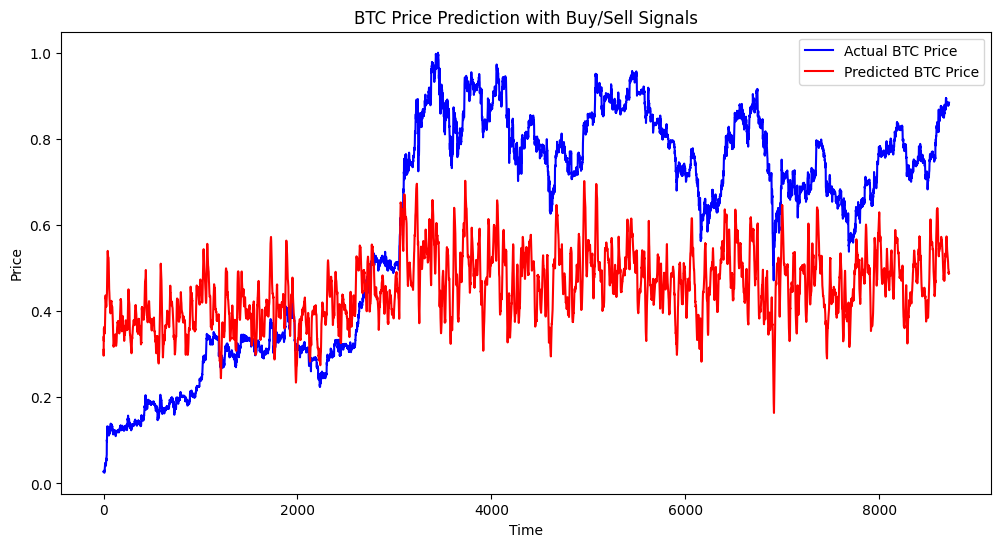

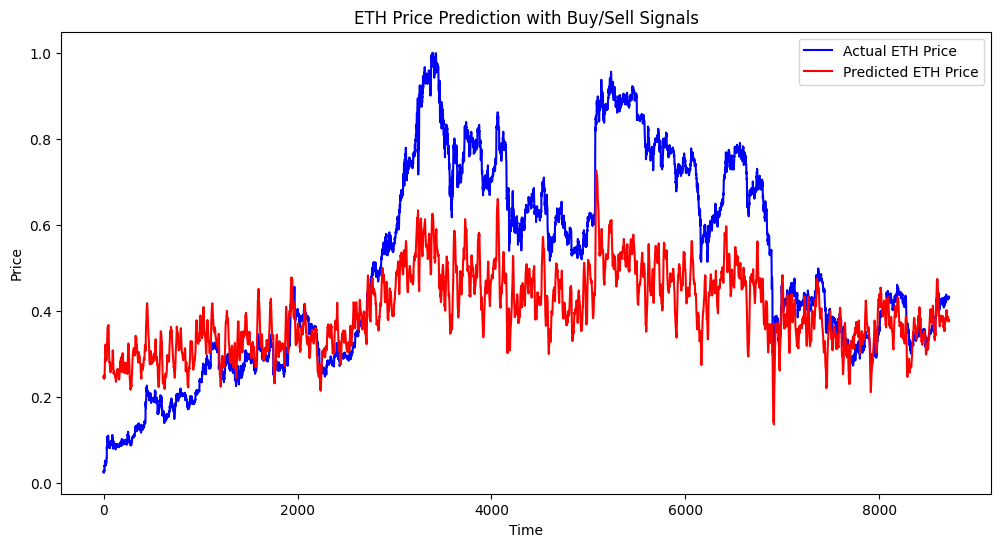

In [13]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted prices with buy/sell signals for BTC
plt.figure(figsize=(12, 6))
plt.plot(y_btc, color='blue', label='Actual BTC Price')
plt.plot(btc_predictions, color='red', label='Predicted BTC Price')

# Mark Buy/Sell signals
for i in range(len(btc_signals)):
    if btc_signals[i] == 'Buy':
        plt.scatter(i, y_btc[i], marker='^', color='green', label='Buy Signal' if i == 0 else "")
    elif btc_signals[i] == 'Sell':
        plt.scatter(i, y_btc[i], marker='v', color='red', label='Sell Signal' if i == 0 else "")

plt.title('BTC Price Prediction with Buy/Sell Signals')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot actual vs. predicted prices with buy/sell signals for ETH
plt.figure(figsize=(12, 6))
plt.plot(y_eth, color='blue', label='Actual ETH Price')
plt.plot(eth_predictions, color='red', label='Predicted ETH Price')

# Mark Buy/Sell signals
for i in range(len(eth_signals)):
    if eth_signals[i] == 'Buy':
        plt.scatter(i, y_eth[i], marker='^', color='green', label='Buy Signal' if i == 0 else "")
    elif eth_signals[i] == 'Sell':
        plt.scatter(i, y_eth[i], marker='v', color='red', label='Sell Signal' if i == 0 else "")

plt.title('ETH Price Prediction with Buy/Sell Signals')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


## Back Testting


Back testing

[*********************100%***********************]  1 of 1 completed


Final Capital after Backtesting for Bitcoin (BTC): 10831.953125
First few trades for Bitcoin (BTC):
('Buy', Timestamp('2024-04-25 10:00:00+0000', tz='UTC'), 63458.68359375)
('Sell', Timestamp('2024-05-04 10:00:00+0000', tz='UTC'), 64290.63671875, 831.953125)


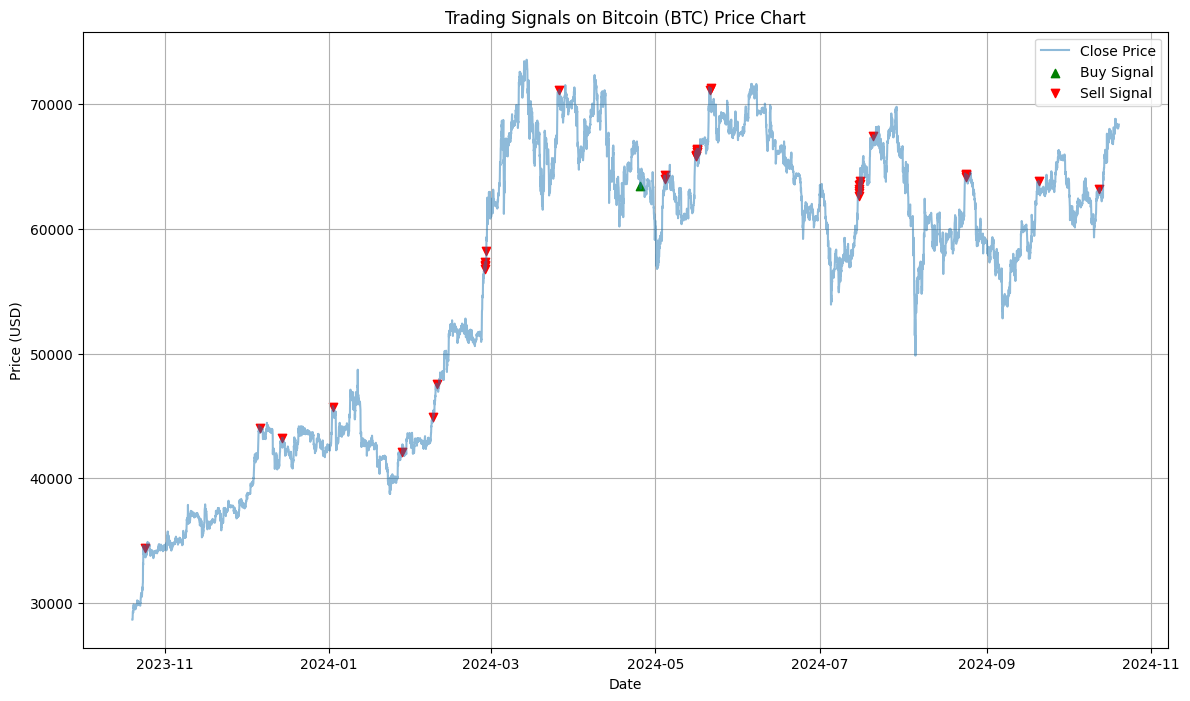

[*********************100%***********************]  1 of 1 completed


Final Capital after Backtesting for Ethereum (ETH): 10008.5888671875
First few trades for Ethereum (ETH):
('Buy', Timestamp('2024-01-23 08:00:00+0000', tz='UTC'), 2291.58203125)
('Sell', Timestamp('2024-02-08 15:00:00+0000', tz='UTC'), 2453.844482421875, 162.262451171875)
('Buy', Timestamp('2024-07-04 17:00:00+0000', tz='UTC'), 3140.82568359375)
('Sell', Timestamp('2024-08-24 08:00:00+0000', tz='UTC'), 2774.605224609375, -366.220458984375)
('Buy', Timestamp('2024-10-02 12:00:00+0000', tz='UTC'), 2437.099365234375)


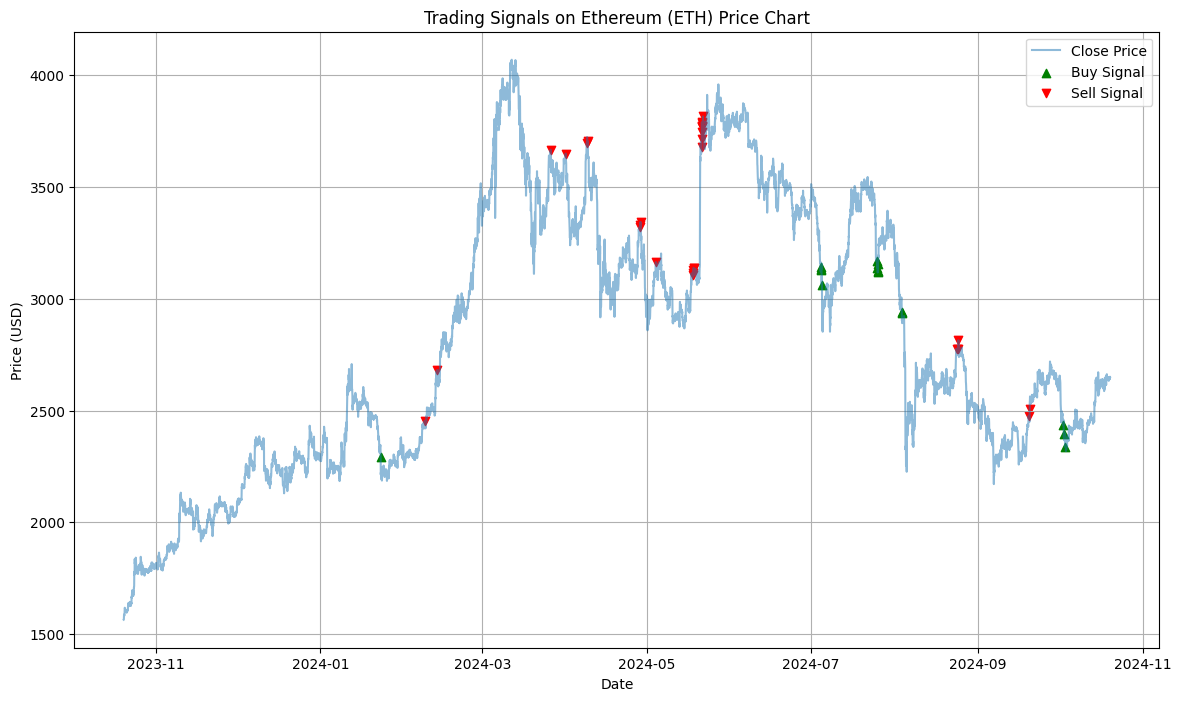

In [14]:
# Define the technical indicators function
def compute_technical_indicators(price_data):
    """
    Calculate various technical indicators for trading.
    """
    # Ensure inputs to ta-lib are NumPy arrays
    close_prices = price_data['Close'].to_numpy().astype(float)

    # Calculate RSI (Relative Strength Index)
    price_data['RSI'] = ta.RSI(close_prices, timeperiod=14)

    # Calculate MACD (Moving Average Convergence Divergence)
    macd, macd_signal, macd_hist = ta.MACD(
        close_prices, fastperiod=12, slowperiod=26, signalperiod=9
    )
    price_data['MACD'] = macd
    price_data['MACD_signal'] = macd_signal

    return price_data

# Define a simple trading strategy based on RSI and MACD indicators
def simple_trading_strategy(data):
    """
    Generate trading signals based on RSI and MACD.
    Buy when RSI < 30 (oversold) and MACD crosses above the signal line.
    Sell when RSI > 70 (overbought) and MACD crosses below the signal line.
    """
    data['Signal'] = 0  # Default to no action
    data['Signal'] = np.where((data['RSI'] < 30) & (data['MACD'] > data['MACD_signal']), 1, data['Signal'])  # Buy signal
    data['Signal'] = np.where((data['RSI'] > 70) & (data['MACD'] < data['MACD_signal']), -1, data['Signal'])  # Sell signal

    # Create Position (1 for holding, -1 for short)
    data['Position'] = data['Signal'].replace(0, np.nan).ffill().fillna(0)
    return data

# Backtesting Function
def backtest_strategy(data, initial_capital=10000):
    """
    Backtest the strategy by simulating trades based on generated signals.
    """
    capital = initial_capital
    position = 0  # 1 for holding, -1 for short
    trades = []

    for i in range(1, len(data)):
        if data['Position'].iloc[i] == 1 and position == 0:  # Buy condition
            position = data['Close'].iloc[i]
            trades.append(('Buy', data.index[i], position))
        elif data['Position'].iloc[i] == -1 and position != 0:  # Sell condition
            profit = data['Close'].iloc[i] - position
            capital += profit
            trades.append(('Sell', data.index[i], data['Close'].iloc[i], profit))
            position = 0  # Reset position

    # Account for any open positions
    if position != 0:
        capital += data['Close'].iloc[-1] - position

    return capital, trades

# Function to plot trading signals on the price chart
def plot_trading_signals(data, crypto_name):
    """
    Plot the trading signals on the price chart.
    """
    plt.figure(figsize=(14, 8))

    # Plot closing prices
    plt.plot(data.index, data['Close'], label='Close Price', alpha=0.5)

    # Plot Buy signals
    buy_signals = data[data['Signal'] == 1]
    plt.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='green', label='Buy Signal', alpha=1)

    # Plot Sell signals
    sell_signals = data[data['Signal'] == -1]
    plt.scatter(sell_signals.index, sell_signals['Close'], marker='v', color='red', label='Sell Signal', alpha=1)

    # Add labels and legend
    plt.title(f'Trading Signals on {crypto_name} Price Chart')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example Usage for BTC and ETH
cryptos = {
    "BTC-USD": "Bitcoin (BTC)",
    "ETH-USD": "Ethereum (ETH)"
}

for symbol, name in cryptos.items():
    # Download data for the past year
    crypto_data = yf.download(symbol, start="2023-10-20", end="2024-10-20", interval="1h")

    # Flatten MultiIndex columns if necessary
    if isinstance(crypto_data.columns, pd.MultiIndex):
        crypto_data.columns = ['_'.join(col).strip() for col in crypto_data.columns.values]

    # Ensure 'Close' column is accessible
    if f'Close_{symbol}' in crypto_data.columns:
        crypto_data['Close'] = crypto_data[f'Close_{symbol}']

    # Drop rows with missing 'Close' values
    crypto_data = crypto_data.dropna(subset=['Close'])

    # Prepare data and run backtest
    crypto_data = compute_technical_indicators(crypto_data)
    crypto_data = simple_trading_strategy(crypto_data)

    # Perform backtesting
    final_capital, trade_log = backtest_strategy(crypto_data)
    print(f"Final Capital after Backtesting for {name}: {final_capital}")

    # Display first few trades for review
    print(f"First few trades for {name}:")
    for trade in trade_log[:5]:
        print(trade)

    # Plot the trading signals
    plot_trading_signals(crypto_data, name)


4.2 Model improvement with return value

In [15]:
def compute_technical_indicators(price_data):
    """
    Calculate various technical indicators for trading.
    """
    # Calculate RSI (Relative Strength Index)
    price_data['RSI'] = ta.RSI(price_data['Close'].values, timeperiod=14)

    # Calculate MACD (Moving Average Convergence Divergence)
    macd, macd_signal, _ = ta.MACD(
        price_data['Close'].values, fastperiod=12, slowperiod=26, signalperiod=9
    )
    price_data['MACD'] = macd
    price_data['MACD_signal'] = macd_signal

    return price_data


[*********************100%***********************]  1 of 1 completed


===== Strategy Backtesting Results =====
Initial Capital: $10000
Final Capital: $14406.26
Total Profit/Loss: $4406.26
Percentage Return: 44.06%
Number of Trades: 23
Win Rate: 65.22%

First few trades:
('Buy', Timestamp('2023-11-14 11:00:00+0000', tz='UTC'), 36296.01171875)
('Sell', Timestamp('2023-11-16 06:00:00+0000', tz='UTC'), 37536.265625, 1240.25390625)
('Buy', Timestamp('2023-11-17 14:00:00+0000', tz='UTC'), 35982.11328125)
('Sell', Timestamp('2023-11-20 09:00:00+0000', tz='UTC'), 37219.89453125, 1237.78125)
('Buy', Timestamp('2023-11-27 02:00:00+0000', tz='UTC'), 37305.53515625)
Final Capital after Backtesting for Bitcoin (BTC): 14406.26171875


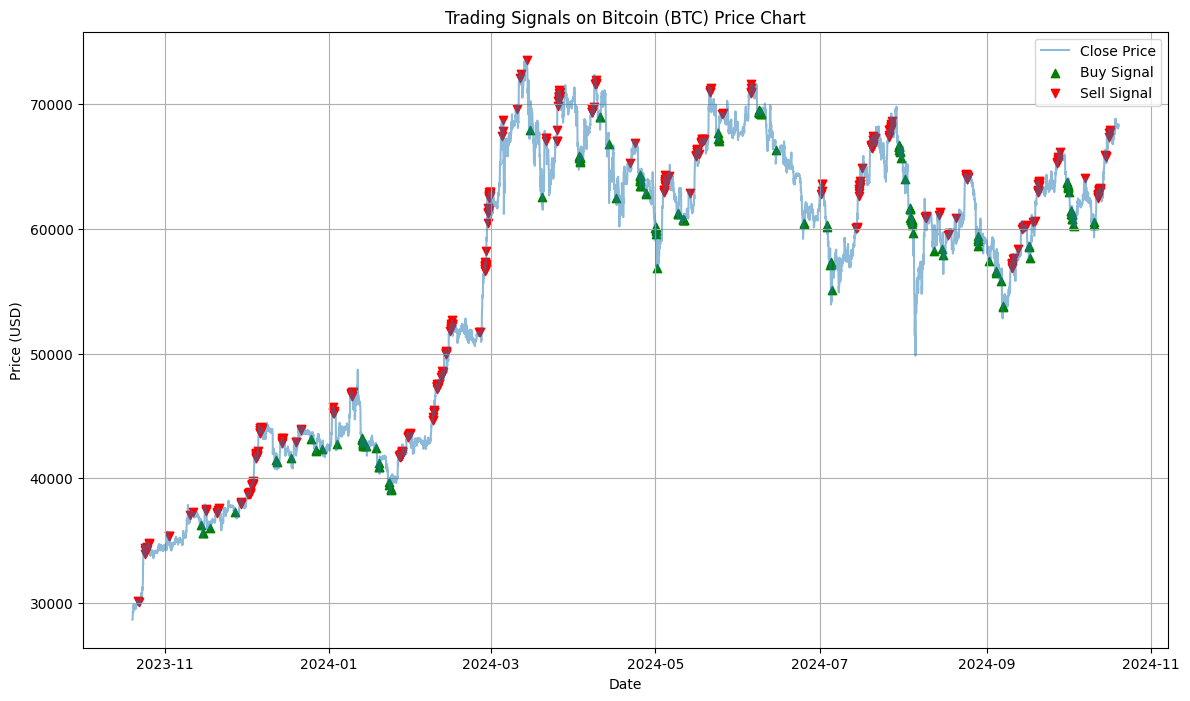

[*********************100%***********************]  1 of 1 completed


===== Strategy Backtesting Results =====
Initial Capital: $10000
Final Capital: $10569.25
Total Profit/Loss: $569.25
Percentage Return: 5.69%
Number of Trades: 27
Win Rate: 74.07%

First few trades:
('Buy', Timestamp('2023-11-03 09:00:00+0000', tz='UTC'), 1792.2008056640625)
('Sell', Timestamp('2023-11-04 17:00:00+0000', tz='UTC'), 1839.6884765625, 47.4876708984375)
('Buy', Timestamp('2023-11-15 06:00:00+0000', tz='UTC'), 1981.455322265625)
('Sell', Timestamp('2023-11-16 11:00:00+0000', tz='UTC'), 2067.998046875, 86.542724609375)
('Buy', Timestamp('2023-11-17 07:00:00+0000', tz='UTC'), 1969.9755859375)
Final Capital after Backtesting for Ethereum (ETH): 10569.25341796875


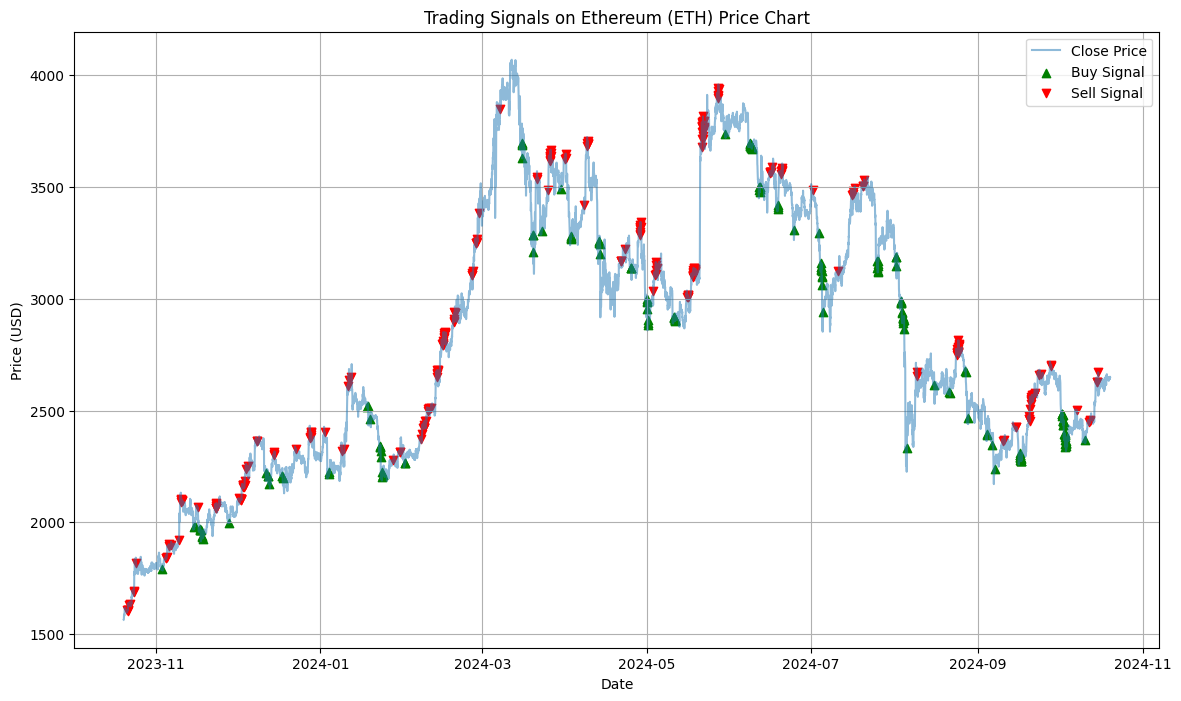

In [16]:

# Define the technical indicators function
def compute_technical_indicators(price_data):
    """
    Calculate various technical indicators for trading.
    """
    # Ensure 'Close' is extracted correctly in case of MultiIndex columns
    if isinstance(price_data.columns, pd.MultiIndex):
        price_data.columns = ['_'.join(col).strip() for col in price_data.columns.values]

    # Ensure the 'Close' column is accessible
    if 'Close' not in price_data.columns and any('Close' in col for col in price_data.columns):
        close_col = [col for col in price_data.columns if 'Close' in col][0]
        price_data['Close'] = price_data[close_col]

    # Ensure no NaNs in the 'Close' column
    price_data = price_data.dropna(subset=['Close'])

    # Convert 'Close' to NumPy array for compatibility with ta-lib
    close_prices = price_data['Close'].to_numpy().astype(float)

    # Calculate RSI (Relative Strength Index)
    price_data['RSI'] = ta.RSI(close_prices, timeperiod=14)

    # Calculate MACD (Moving Average Convergence Divergence)
    macd, macd_signal, macd_hist = ta.MACD(
        close_prices, fastperiod=12, slowperiod=26, signalperiod=9
    )
    price_data['MACD'] = macd
    price_data['MACD_signal'] = macd_signal

    # Additional Indicators: Moving Averages for trend confirmation
    price_data['EMA_20'] = ta.EMA(close_prices, timeperiod=20)
    price_data['SMA_50'] = ta.SMA(close_prices, timeperiod=50)

    return price_data

# Enhanced Trading Strategy with Adjustable Parameters
def enhanced_trading_strategy(data, rsi_buy=40, rsi_sell=60, use_ma_filter=False,
                              stop_loss_pct=0.03, take_profit_pct=0.05):
    """
    Generate trading signals based on RSI, MACD, and additional trend confirmation.
    Includes Stop-Loss, Take-Profit mechanisms.
    """
    data['Signal'] = 0

    # Adjust buy/sell logic based on inputs
    buy_condition = (data['RSI'] < rsi_buy) & (data['MACD'] > data['MACD_signal'])
    sell_condition = (data['RSI'] > rsi_sell) & (data['MACD'] < data['MACD_signal'])

    # Apply trend filter if requested
    if use_ma_filter:
        buy_condition &= (data['Close'] > data['SMA_50'])
        sell_condition &= (data['Close'] < data['SMA_50'])

    # Set signals
    data['Signal'] = np.where(buy_condition, 1, data['Signal'])  # Buy signal
    data['Signal'] = np.where(sell_condition, -1, data['Signal'])  # Sell signal

    # Implement Position and Risk Management
    data['Position'] = data['Signal'].replace(0, np.nan).ffill().fillna(0)

    return data

# Function to plot trading signals on the price chart
def plot_trading_signals(data, crypto_name):
    """
    Plot the trading signals on the price chart.
    """
    plt.figure(figsize=(14, 8))
    plt.plot(data.index, data['Close'], label='Close Price', alpha=0.5)

    buy_signals = data[data['Signal'] == 1]
    plt.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='green', label='Buy Signal', alpha=1)

    sell_signals = data[data['Signal'] == -1]
    plt.scatter(sell_signals.index, sell_signals['Close'], marker='v', color='red', label='Sell Signal', alpha=1)

    plt.title(f'Trading Signals on {crypto_name} Price Chart')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Enhanced Backtesting Function to Show Profit
def backtest_and_show_profit(data, initial_capital=10000):
    """
    Backtest the strategy by simulating trades based on generated signals.
    Show profit/loss, total return, percentage return, and other key metrics.
    """
    capital = initial_capital
    position = 0  # 1 for holding, -1 for short
    trades = []
    total_profit = 0
    num_trades = 0
    wins = 0

    for i in range(1, len(data)):
        if data['Position'].iloc[i] == 1 and position == 0:  # Buy condition
            position = data['Close'].iloc[i]
            trades.append(('Buy', data.index[i], position))
        elif data['Position'].iloc[i] == -1 and position != 0:  # Sell condition
            exit_price = data['Close'].iloc[i]
            profit = exit_price - position
            capital += profit
            total_profit += profit
            num_trades += 1
            if profit > 0:
                wins += 1
            trades.append(('Sell', data.index[i], exit_price, profit))
            position = 0  # Reset position

    # Account for any open positions
    if position != 0:
        profit = data['Close'].iloc[-1] - position
        total_profit += profit
        capital += profit
        num_trades += 1
        if profit > 0:
            wins += 1

    # Calculate key metrics
    total_return = capital - initial_capital
    percentage_return = (total_return / initial_capital) * 100
    win_rate = (wins / num_trades) * 100 if num_trades > 0 else 0

    # Display the results
    print("===== Strategy Backtesting Results =====")
    print(f"Initial Capital: ${initial_capital}")
    print(f"Final Capital: ${capital:.2f}")
    print(f"Total Profit/Loss: ${total_profit:.2f}")
    print(f"Percentage Return: {percentage_return:.2f}%")
    print(f"Number of Trades: {num_trades}")
    print(f"Win Rate: {win_rate:.2f}%")

    # Show first few trades
    print("\nFirst few trades:")
    for trade in trades[:5]:
        print(trade)

    return capital, trades

# Example Usage for BTC and ETH
cryptos = {
    "BTC-USD": "Bitcoin (BTC)",
    "ETH-USD": "Ethereum (ETH)"
}

for symbol, name in cryptos.items():
    # Download data for the past year
    crypto_data = yf.download(symbol, start="2023-10-20", end="2024-10-20", interval="1h")

    # Prepare data and run enhanced strategy
    crypto_data = compute_technical_indicators(crypto_data)
    crypto_data = enhanced_trading_strategy(
        crypto_data, rsi_buy=40, rsi_sell=60, use_ma_filter=False,
        stop_loss_pct=0.05, take_profit_pct=0.1
    )

    # Perform backtesting and show profit
    final_capital, trade_log = backtest_and_show_profit(crypto_data)
    print(f"Final Capital after Backtesting for {name}: {final_capital}")

    # Plot the trading signals
    plot_trading_signals(crypto_data, name)


4.3 Comparison

In [17]:

# Parameters
initial_capital = 10000  # Initial capital in USD for each cryptocurrency
start_date = "2023-11-03"
end_date = "2024-10-03"
crypto_symbols = ["BTC-USD", "ETH-USD"]

# Fetch data
data = {}
for symbol in crypto_symbols:
    data[symbol] = yf.download(symbol, start=start_date, end=end_date)['Close']

# Calculate buy and hold profit
profits = {}
for symbol in crypto_symbols:
    start_price = float(data[symbol].iloc[0])  # First closing price as a float
    end_price = float(data[symbol].iloc[-1])   # Last closing price as a float
    profit = (end_price - start_price) / start_price * initial_capital
    profits[symbol] = profit

# Display individual results
for symbol, profit in profits.items():
    print(f"Buy and Hold profit for {symbol} from {start_date} to {end_date}: ${profit:.2f}")
    final_capital = initial_capital + profit
    print(f"Final capital for {symbol}: ${final_capital:.2f}\n")

# Total portfolio profit if split evenly
total_profit = sum(profits.values())
print(f"Total portfolio buy and hold profit across BTC and ETH: ${total_profit:.2f}")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Buy and Hold profit for BTC-USD from 2023-11-03 to 2024-10-03: $7457.16
Final capital for BTC-USD: $17457.16

Buy and Hold profit for ETH-USD from 2023-11-03 to 2024-10-03: $2905.05
Final capital for ETH-USD: $12905.05

Total portfolio buy and hold profit across BTC and ETH: $10362.22



<ipython-input-17-a14deb996b9e>:15: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  start_price = float(data[symbol].iloc[0])  # First closing price as a float
<ipython-input-17-a14deb996b9e>:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  end_price = float(data[symbol].iloc[-1])   # Last closing price as a float


# References

1. Binance. (n.d.). Binance API documentation. Binance. Retrieved from https://binance-docs.github.io/apidocs/spot/en/
2.Brownlee, J. (2017). Long Short-Term Memory Networks with Python: Develop Sequence Prediction Models with Deep Learning. Machine Learning Mastery.
3.Chollet, F. (2018). Deep Learning with Python. Manning Publications.
4.Alternative.me. (n.d.). Crypto Fear & Greed Index. Retrieved from https://alternative.me/crypto/fear-and-greed-index/
5.Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, E. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12, 2825–2830. https://doi.org/10.5555/1953048.2078195
6.McKinney, W. (2010). Data Structures for Statistical Computing in Python. In Proceedings of the 9th Python in Science Conference (pp. 56-61). https://doi.org/10.25080/Majora-92bf1922-00a
7.Warden, P. (2015). How to Use the TensorFlow LSTM Model. TensorFlow. Retrieved from https://www.tensorflow.org/tutorials
8.The Pandas Development Team. (2020). Pandas Documentation. Retrieved from https://pandas.pydata.org/docs/
9.Oliphant, T. E. (2006). A guide to NumPy. Trelgol Publishing.
10.Hunter, J. D. (2007). Matplotlib: A 2D graphics environment. Computing in Science & Engineering, 9(3), 90-95. https://doi.org/10.1109/MCSE.2007.55